In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib



board = np.zeros((10, 10))
board



array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [2]:
def place_ship(mat_w_ship):
    board_truth_table = board
    board_truth_table[board_truth_table != 0] = 1
    mat_w_ship_truth_table = mat_w_ship
    mat_w_ship_truth_table[mat_w_ship_truth_table != 0] = 1

    board_w_ship_test = np.add(board_truth_table, mat_w_ship_truth_table)
    ship_cannot_be_added = np.any(board_w_ship_test > 1)
    # if nothing greater than 1 in the matrix addition, the ship can be placed
    if (not ship_cannot_be_added):
        # TODO: update board with the placed ship
        newboard = np.add(board, mat_w_ship)
        return newboard
    else:
        return board

place_ship(np.zeros((10, 10)))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [3]:
def plot_board(board):
    cmap = matplotlib.cm.get_cmap('CMRmap_r')
    normalize = matplotlib.colors.Normalize(vmin=0, vmax=5)
    colors = [cmap(normalize(value)) for value in range(0, 5)]
    plt.matshow(board, cmap=cmap)
    plt.xticks(np.arange(0.5, 10.5), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.yticks(np.arange(0.5, 10.5), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.grid()
    # plt.colorbar()
    plt.show()
    


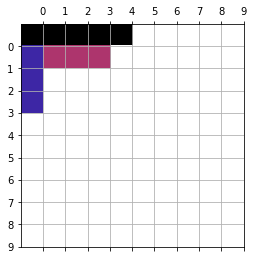

In [4]:
# y, x notation
board[0, 0:5] = 5
board[1:4, 0] = 4
board[1,1:4] = 3


plot_board(board)